In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Namrata Patil\Desktop\620 DMPA\data.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df= df.drop(['customerID'], axis=1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df[df["TotalCharges"]== ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [9]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df[df['tenure']==0]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [11]:
df = df[df['tenure'] != 0]

In [12]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace = True)

In [13]:
df['TotalCharges'].isna().sum()

0

In [14]:
df['SeniorCitizen'].nunique()

2

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [16]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

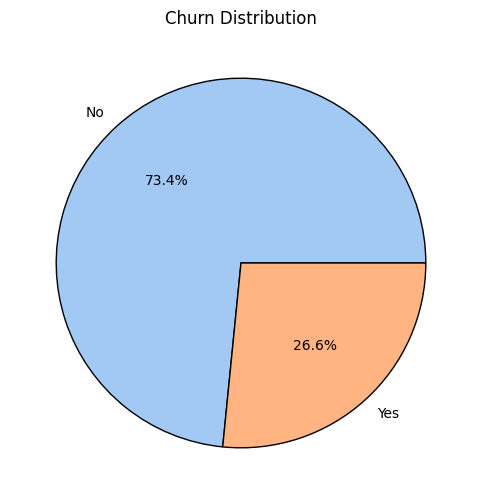

In [17]:
#prepare the data
type = ['No', 'Yes']
churn_counts = df['Churn'].value_counts()

#plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = type, autopct = '%1.1f%%', colors = sns.color_palette('pastel'), 
        wedgeprops = {'edgecolor': 'black'})
plt.title("Churn Distribution")
plt.show()

In [18]:
#create the cross table

contingency_table = pd.crosstab(df['Churn'], df['gender'])

#display the cross table
print(contingency_table)

gender  Female  Male
Churn               
No        2544  2619
Yes        939   930


In [19]:
#calculate proportions

proportions=df.groupby(['Churn','gender']).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index(name='proportion')

C:\Users\Namrata Patil\AppData\Local\Temp\ipykernel_28840\3327502576.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions=df.groupby(['Churn','gender']).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index(name='proportion')


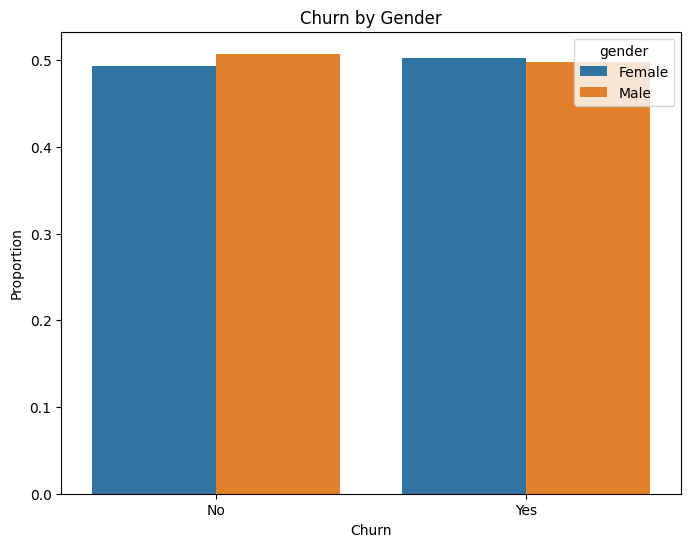

In [20]:
#create count plot
plt.figure(figsize = (8,6))
sns.barplot(x = 'Churn', y='proportion', hue='gender', data=proportions)
plt.title('Churn by Gender')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.show()

In [21]:
from scipy.stats import chi2_contingency

#create a contingency table(cross-tabulation) of the two variables
contingency_table = pd.crosstab(df['Churn'], df['gender'])

#perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

#print the results
print("Chi-squared statistic", chi2_stat)
print("P-value:", p_val)
print(expected)

Chi-squared statistic 0.47545453727386294
P-value: 0.490488470706551
[[2557.27090444 2605.72909556]
 [ 925.72909556  943.27090444]]


If the p-value is less than chosen significance level (commonly 0.05), we would reject the null hypothesis, suggesting that there is significant evidence to conclude that there is an association between the categorical variables.

If the p-value is greater than your chosen significance level, we would fail to reject the null hypothesis, suggesting that there is not enough evidence to conclude that there is an association between the categorical variables.

In this case, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that there is an association between the Churn and Gender.

C:\Users\Namrata Patil\AppData\Local\Temp\ipykernel_28840\2259561276.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions = df.groupby(['Churn','Contract']).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index(name='proportion')


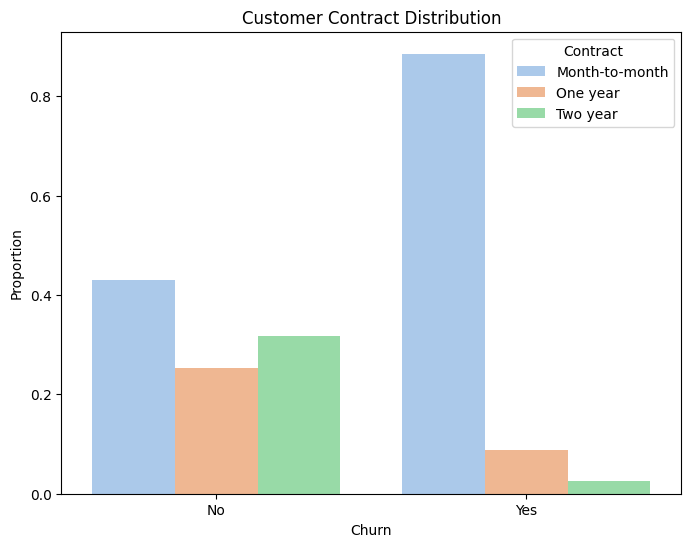

In [22]:
#calculate the proportions
proportions = df.groupby(['Churn','Contract']).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index(name='proportion')

#create the bar plot
plt.figure(figsize =(8,6))
sns.barplot(x='Churn', y='proportion', hue ='Contract', data=proportions,palette='pastel')

plt.title('Customer Contract Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.show()

Customers with monthly contract are more likely to churn

In [23]:
contingency_table = pd.crosstab(df['Churn'], df['Contract'])

#perform the chi-squared test
chi2_stat, p_val,dof,expected=chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2_stat)
print('P-value:', p_val)

Chi-squared statistic: 1179.5458287339447
P-value: 7.326182186264635e-257


In [24]:
labels=df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
values

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

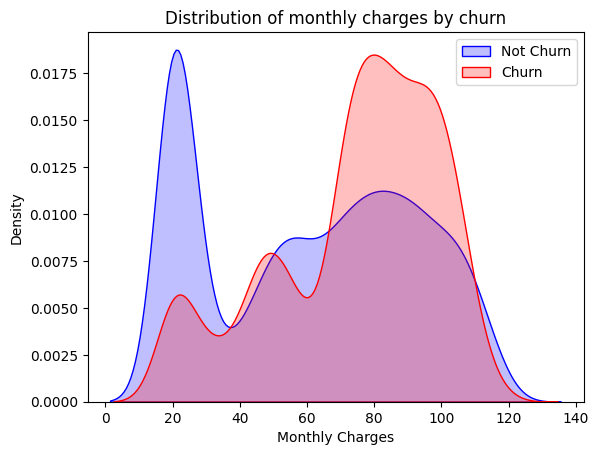

In [25]:
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'],color='Blue',fill=True)
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'],color='Red',fill=True)
ax.legend(['Not Churn','Churn'],loc ='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

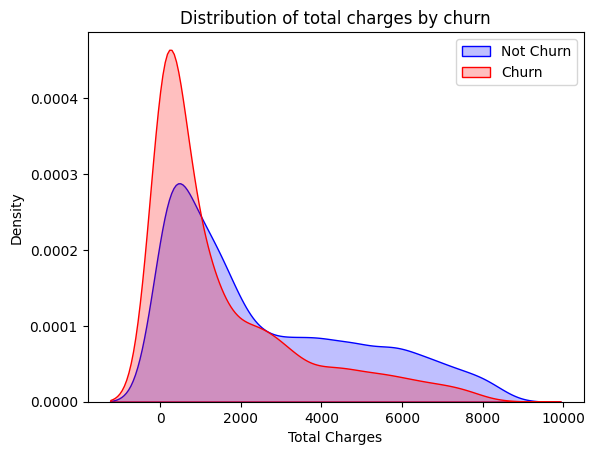

In [26]:
ax = sns.kdeplot(df['TotalCharges'][df['Churn']=='No'],color='Blue',fill=True)
ax = sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'],color='Red',fill=True)
ax.legend(['Not Churn','Churn'],loc ='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

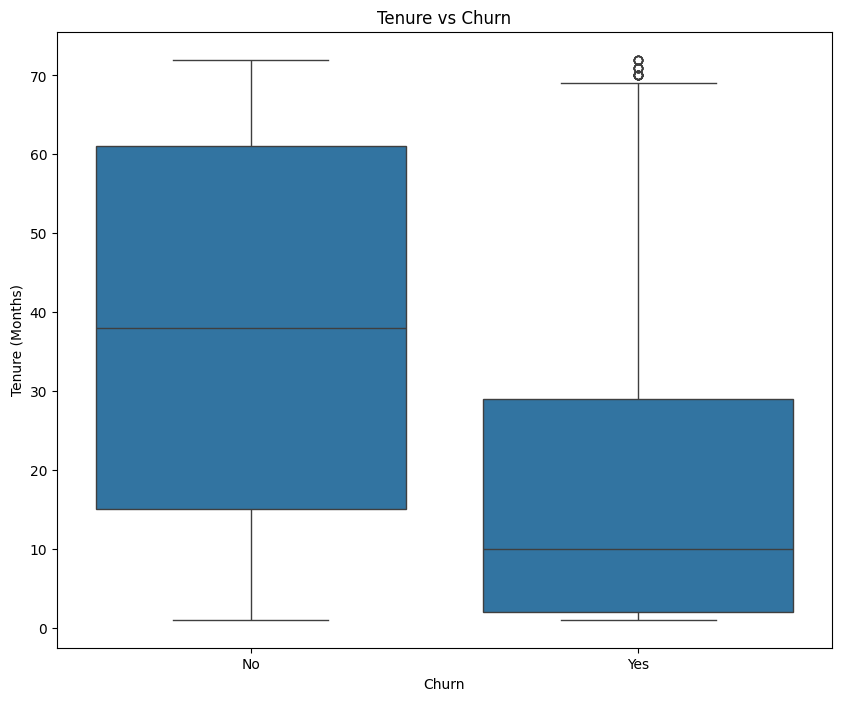

In [27]:
#create a box plot
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

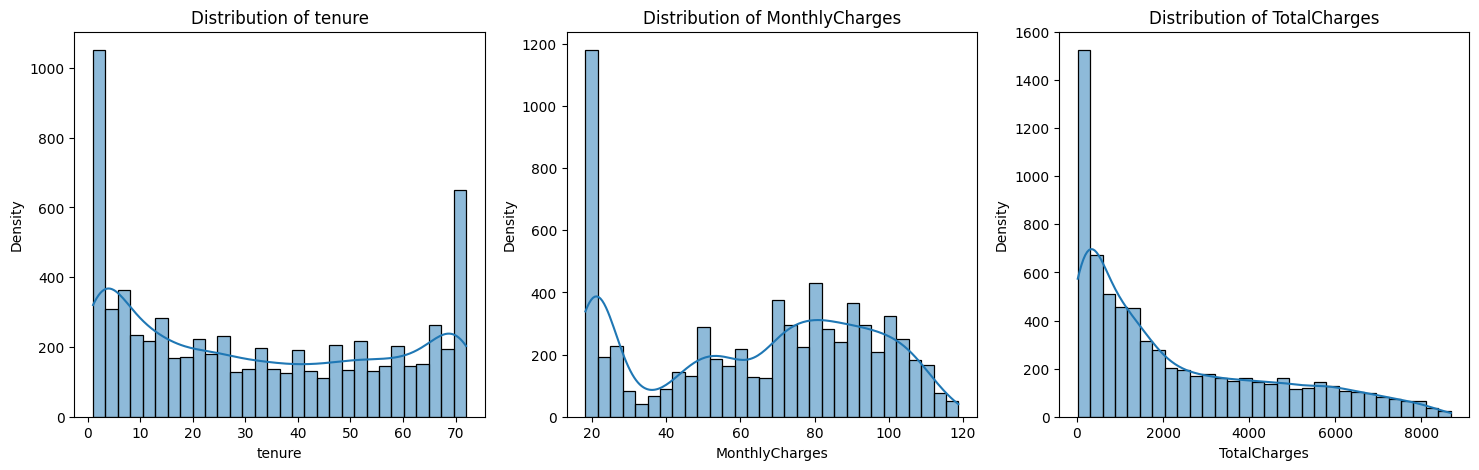

In [28]:
#define numerical columns for distribution plotting
num_cols=['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize =(18,5))

for i, feat in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[feat].dropna(),kde=True,bins=30) #Drop na values for plotting
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Density')
plt.show()

In [29]:
#identify categorical columns (excluding 'customerID' as it's a unique identifier)

categorical_columns = df.select_dtypes(include=['object']).columns

#create dummy variables for categorical columns
df = pd.get_dummies(df,columns=categorical_columns, drop_first=True)

In [30]:
df.head()

tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_Yes  \
0       1           29.85         29.85            0                  0   
1      34           56.95       1889.50            1                  0   
2       2           53.85        108.15            1                  0   
3      45           42.30       1840.75            1                  0   
4       2           70.70        151.65            0                  0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                               1                  0  ...                0   
1                               0                  0  ...                0   
2                               0                  0  ...                0   
3                               1                  0  ...                0   
4                               0                  0  ...                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_Yes  
0                           0          0  
1                           1          0  
2                           1          1  
3                           0          0  
4                           0          1  

[5 rows x 31 columns]

In [31]:
#define features (X) and target variable (y)

X = df.drop(['Churn_Yes'],axis=1)
y= df['Churn_Yes']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

#standardize the numerical features
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns]= scaler.transform(X_test[numerical_columns])

#confirm the first few rows of the scaled training data
X_train.head()

tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_Yes  \
6030  0.434674       -0.518620     -0.087908            0                  0   
3410 -1.195652       -0.374443     -0.921285            1                  0   
5483  0.923772        0.432616      0.963781            0                  0   
5524  0.516190       -0.333013      0.122920            1                  0   
6337  0.923772        1.199902      1.401088            0                  0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
6030            0               0                 0   
3410            0               0                 1   
5483            1               0                 1   
5524            1               1                 1   
6337            1               1                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
6030                               1                  0  ...   
3410                               0                  0  ...   
5483                               0                  1  ...   
5524                               0                  0  ...   
6337                               0                  1  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
6030                                0                1   
3410                                0                1   
5483                                0                0   
5524                                0                0   
6337                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
6030                                    0                    1   
3410                                    0                    0   
5483                                    0                    0   
5524                                    0                    0   
6337                                    0                    1   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
6030                  0                  0                     1   
3410                  0                  0                     0   
5483                  0                  0                     1   
5524                  0                  1                     0   
6337                  1                  0                     0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6030                                      0                               0   
3410                                      1                               0   
5483                                      0                               1   
5524                                      0                               0   
6337                                      0                               0   

      PaymentMethod_Mailed check  
6030                           0  
3410                           0  
5483                           0  
5524                           0  
6337                           1  

[5 rows x 30 columns]

In [32]:
#initialize the logistic regression model

logreg = LogisticRegression(max_iter=1000,random_state=42)

#fit the model to the training data
logreg.fit(X_train, y_train)

#predict on the testing set
y_pred = logreg.predict(X_test)

#calculate accuracy
accuracy= accuracy_score(y_test,y_pred)

#generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.7867803837953091,
 array([[915, 118],
        [182, 192]], dtype=int64))

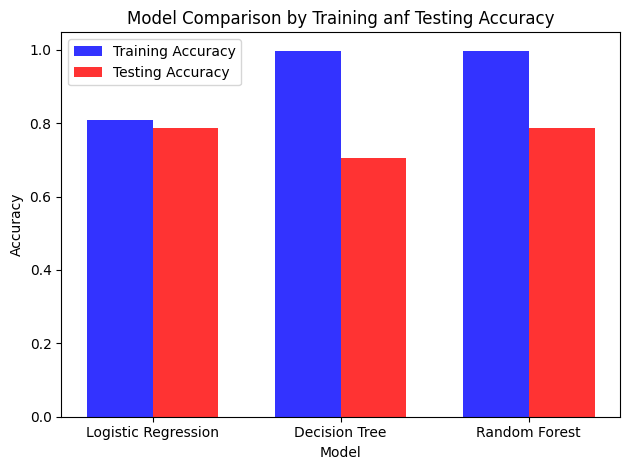

In [33]:
#initialize the decision tree and random forest models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest= RandomForestClassifier(random_state=42, n_jobs=-1)

#fit the models to the training data
decision_tree.fit(X_train,y_train)
random_forest.fit(X_train,y_train)

#predict on training and testing sets
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

#calculate accuracy for decision tree
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)

#calculate accuracy for random forest
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf =accuracy_score(y_test,y_pred_test_rf)

#predict on the training set for logistic regression to compare training performance
y_pred_train_lr = logreg.predict(X_train)
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)

#prepare data for plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_train = [accuracy_train_lr,accuracy_train_dt,accuracy_train_rf]
accuracy_test = [accuracy,accuracy_test_dt,accuracy_test_rf]

#plotting
fig,ax = plt.subplots()
index = range(len(models))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index,accuracy_train,bar_width,alpha=opacity,color='b',label='Training Accuracy')
rects2 = ax.bar([p+bar_width for p in index], accuracy_test, bar_width, alpha = opacity, color='r', label='Testing Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison by Training anf Testing Accuracy')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

In [34]:
#calculate AUC for logistic regression
auc_lr = roc_auc_score(y_test,logreg.predict_proba(X_test)[:, 1])

#calculate AUC for decision tree
auc_dt = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

#calculate AUC for random forest
auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

print(f'AUC of Logitsic Regression: {auc_lr}')
print(f'AUC of Decision Tree: {auc_dt}')
print(f'AUC of Random Forest: {auc_rf}')

AUC of Logitsic Regression: 0.8320063570618779
AUC of Decision Tree: 0.6403251523261773
AUC of Random Forest: 0.8165459618679822


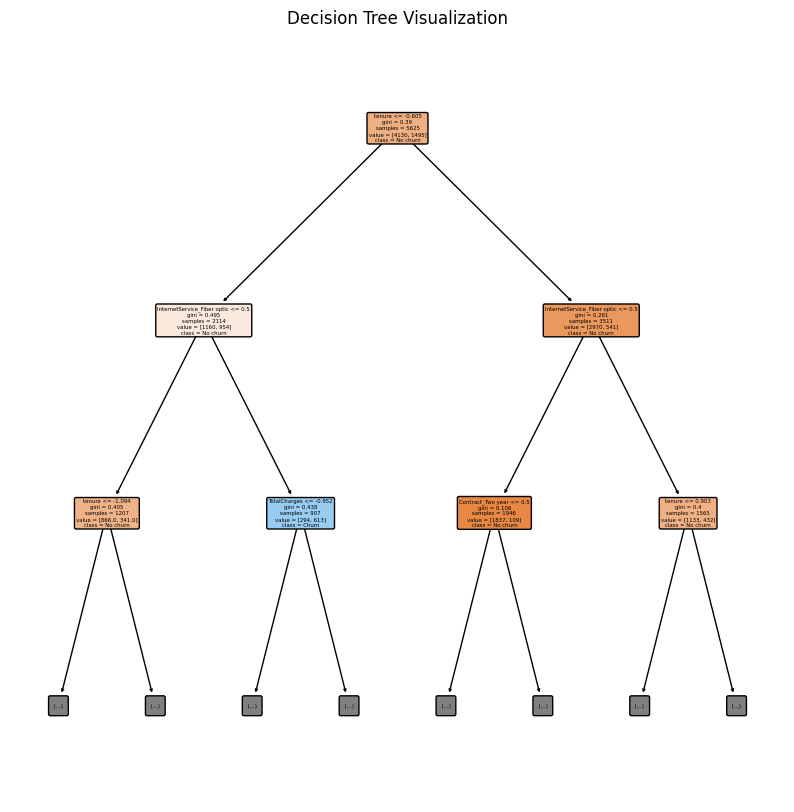

In [35]:
from sklearn.tree import plot_tree

#plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(decision_tree, filled=True,rounded=True,class_names=['No churn','Churn'],feature_names=list(X.columns),
         max_depth=2)  #limit depth for readability
plt.title("Decision Tree Visualization")
plt.show()

In [36]:
#extract coefficients from the logistic regression model

coefficients = logreg.coef_[0]

#create a DataFrame to visualize the coefficients (importance) of features
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient':coefficients})

#Sort the DataFrame by the absolute values of coefficients for importance
coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)

C:\Users\Namrata Patil\AppData\Local\Temp\ipykernel_28840\1120746493.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data= top_features_df, palette='pastel')


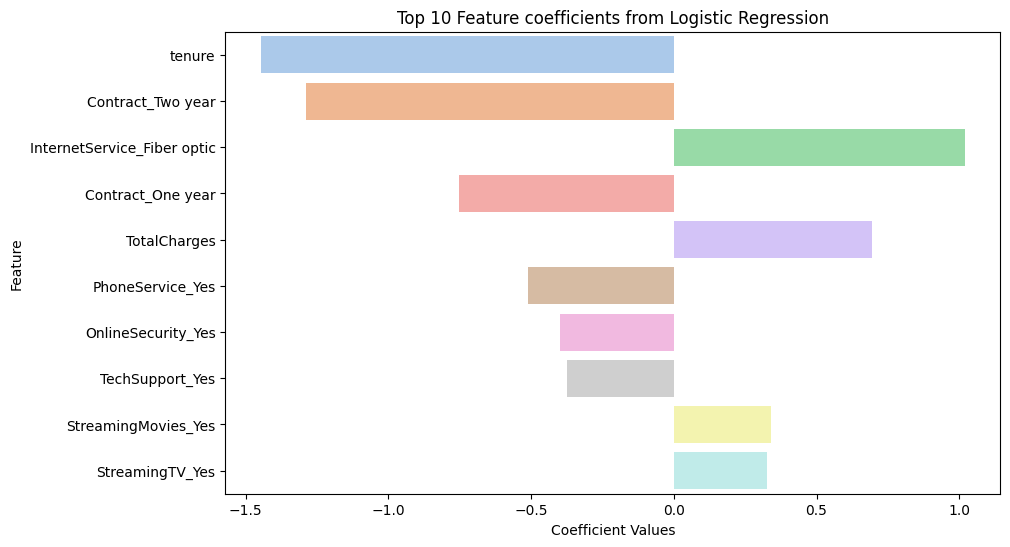

In [37]:
#plotting the top 10 most impactful features from logistic regression
top_features_df = coefficients_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data= top_features_df, palette='pastel')
plt.title('Top 10 Feature coefficients from Logistic Regression')
plt.xlabel('Coefficient Values')
plt.ylabel('Feature')
plt.show()

Conclusion

1) Customer churn is significantly associated with the type of contract (month-to-month vs long-term). Customers with monthly contracts are much more likely to churn compared to those with long-term contracts. 
2) There is no significant association between customer churn and gender based on the chi-squared test.
3) Customers who churn tend to have lower monthly charges and lower total charges compared to those who do not churn, as evident from the density plots.
4) Customers with shorter tenure (less time as a customer) are more likely to churn, as seen in the box plot.
5) The logistic regression model performed better than the decision tree and random forest models in terms of accuracy and AUC on the test data.
6) The most important features for predicting churn, according to the logistic regression model coefficients, are contract type, internet service, online security, online backup, and payment method.
